In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml/Diabetes.csv")

In [7]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df["diabetes"].value_counts()

,count
diabetes,
0,500
1,268


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
diastolic,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
triceps,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
dpf,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
X = df.drop(["diabetes"], axis=1)
y = df["diabetes"]

In [13]:
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
y.head()

,diabetes
0,1
1,0
2,1
3,0
4,1


In [16]:
log_model = LogisticRegression(solver="liblinear").fit(X, y)

In [17]:
log_model.intercept_

array([-5.87718796])

In [18]:
log_model.coef_

array([[ 1.16964087e-01,  2.83546408e-02, -1.69095993e-02,
         7.62955999e-04, -6.39640890e-04,  5.95695366e-02,
         6.74964428e-01,  7.20720647e-03]])

In [19]:
log_model.predict(X)[:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [20]:
prediction = log_model.predict(X)  # predicted values 0-1 class

In [23]:
y[0:10]   # actual values

,diabetes
0,1
1,0
2,1
3,0
4,1
5,0
6,1
7,0
8,1
9,1


In [32]:
prediction = log_model.predict_proba(X)  # predicted probabilities
prediction                               # prob > 0.5 = 1 , prob < 0.5 = 0

array([[0.35082947, 0.64917053],
       [0.91675877, 0.08324123],
       [0.22489122, 0.77510878],
       ...,
       [0.76687242, 0.23312758],
       [0.69736273, 0.30263727],
       [0.89031563, 0.10968437]])

In [24]:
confision_matrix = confusion_matrix(y, prediction)
confision_matrix

array([[448,  52],
       [121, 147]])

In [25]:
accuracy_score(y, prediction)  # true values / all values

0.7747395833333334

In [27]:
print(classification_report(y, prediction))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



# **ROC - Receiver Operating Characteristic**

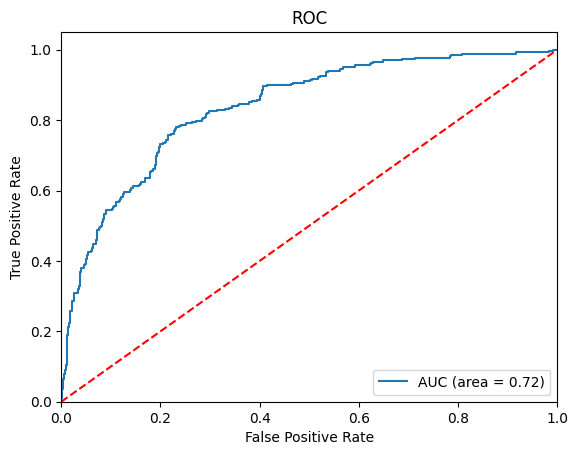

In [35]:
logit_roc_auc = roc_auc_score(y, log_model.predict(X))
ftr, tpr, thresholds = roc_curve(y, log_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(ftr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)  # TPR-recall , AUC (Area Under Curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

# Model Validation

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
log_model = LogisticRegression(solver="liblinear").fit(X_train, y_train)

In [38]:
y_pred = log_model.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred)

0.7597402597402597

In [41]:
cross_val_score(log_model, X_test, y_test, cv=10)

array([0.8125    , 0.75      , 0.75      , 0.8125    , 0.73333333,
       0.93333333, 0.8       , 0.73333333, 0.93333333, 0.66666667])

In [42]:
cross_val_score(log_model, X_test, y_test, cv=10).mean()

0.7925

In [ ]:
'''
Logistic regression, doğrusal bir regresyon modeli kullanarak bir olasılık tahmin eder, bu tahmin daha sonra sınıflandırma yapmak için kullanılır.
Yani altında yatan matematiksel işlem bir regresyon olduğundan "logistic regression" olarak adlandırılır.
Ancak, tahmin ettiği şey son aşamada bir sınıf (0 veya 1) olduğundan sınıflandırma problemi olarak kullanılır.

ROC eğrisi, sınıflandırma modelinizin çeşitli eşik değerleri (thresholds) için Doğru Pozitif Oranı (True Positive Rate - TPR) ve
Yanlış Pozitif Oranı (False Positive Rate - FPR) nasıl değiştirdiğini gösteren bir grafiktir.

'''